In [6]:
# Function to process text data from a file and output values
def process_text_data_from_file(file_path):
    with open(file_path, 'r') as file:
        text = file.read()
    
    # Split the text by lines
    lines = text.split('\n')
    
    # Process each line and output the values
    for line in lines:
        print(line)

# Example usage
file_path = r'D:\Exercises\HIWI\EllipDet-master\Industrial\gt\gt_4-1a.jpg.txt'
process_text_data_from_file(file_path)

1
312.7793 251.7310 23.8019 24.9789 8.8704



In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import PIL as pil
%matplotlib inline

In [8]:
# Load the image using pil
img_test = cv2.imread(r'D:\Exercises\HIWI\EllipDet-master\Industrial\images\4-1a.bmp')

In [9]:
## take file path values and add ellipse to the image using the values
def add_ellipse_to_image(file_path, image):
    ellipses = []
    with open(file_path, 'r') as file:
        for line in file:
            values = line.split()
            if len(values) == 5:
                x, y, major_axis, minor_axis, angle = map(float, values)
                ellipses.append({
                    "center": (int(x), int(y)),
                    "axes": (int(major_axis), int(minor_axis)),  # Divide by 2 to get radii
                    "angle": angle,
                    "start_angle": 0,
                    "end_angle": 360,
                    "color": (0, 255, 0),  # Green color
                    "thickness": 2  # Line thickness
                })
    new_img = image.copy()
    for ellipse in ellipses:
        cv2.ellipse(
            new_img,
            ellipse["center"],
            ellipse["axes"],
            ellipse["angle"],
            ellipse["start_angle"],
            ellipse["end_angle"],
            ellipse["color"],
            ellipse["thickness"]
        )
    return new_img

fin_image = add_ellipse_to_image(file_path, img_test)

In [10]:
def add_ellipse_to_image_direct(ellipses, image):
    new_img = image.copy()
    for ellipse in ellipses:
        cv2.ellipse(
            new_img,
            ellipse["center"],
            ellipse["axes"],
            ellipse["angle"],
            ellipse["start_angle"],
            ellipse["end_angle"],
            ellipse["color"],
            ellipse["thickness"]
        )
    return new_img

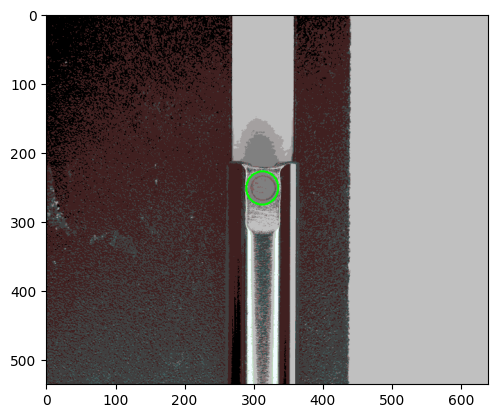

In [11]:
fin_image = add_ellipse_to_image(file_path, img_test)
plt.imshow(fin_image)
plt.show()


In [12]:
## lets resize the image to 640,640 before applying the ellipse
def resize_image(image, filename,target_size):
    original_height, original_width = image.shape[:2]
    scale_x = target_size / original_width
    scale_y = target_size / original_height

    resized_image = cv2.resize(image, (target_size, target_size))

    with open(filename, 'r') as f:
        num_ellipses = int(f.readline().strip())
        resized_ellipses = []
        for _ in range(num_ellipses):
            line = f.readline().strip()
            if line:
                x_center, y_center, width, height, angle = map(float, line.strip().split())

                # Scale ellipse parameters
                x_center = int(x_center * scale_x)
                y_center = int(y_center * scale_y)
                width = int(width * scale_x)
                height = int(height * scale_y)
                
                original_angle_rad = math.radians(angle)
                tan_2theta = math.tan(2 * original_angle_rad)
                scale_ratio = scale_y / scale_x
                tan_2theta_prime = (tan_2theta * scale_ratio) / (1 + tan_2theta**2 * (scale_ratio**2 - 1))
                new_angle_rad = 0.5 * math.atan(tan_2theta_prime)
                new_angle = math.degrees(new_angle_rad)
                resized_ellipses.append({
                    'center': (x_center, y_center),
                    'axes': (width, height),  # Divide width and height by 2 for axes
                    'angle': new_angle_rad,
                    "start_angle": 0,
                    "end_angle": 360,
                    "color": (0, 255, 0),  # Green color
                    "thickness": 2
                })
    return resized_image, resized_ellipses

resized_image, resized_ellipse = resize_image(img_test.copy(), file_path, 640)

fin_image_1 = add_ellipse_to_image_direct(resized_ellipse, resized_image)



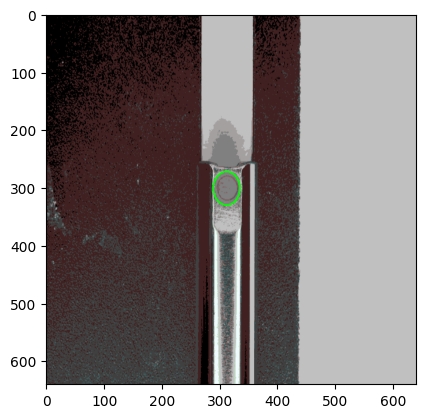

In [13]:
plt.imshow(fin_image_1)
plt.show()

# Ellipse Rcnn Testing

In [2]:
import typer

ModuleNotFoundError: No module named 'typer'

In [ ]:
typer.echo(f"Loading model from {model_path}...")
model = EllipseRCNNModule.load_from_checkpoint(model_path)